In [1]:
# Import-o-rama
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Read CSV files
hk_questions = pd.read_csv('Data/questions.csv')
hk_answers = pd.read_csv('Data/answers.csv')
hk_survey_year = pd.read_csv('Data/survey.csv')

In [3]:
# Merge Questions and answers
hk_survey_data = pd.merge(hk_questions , hk_answers , left_on='questionid' , right_on='QuestionID')

# Filter questions for HK, probably won't need all of these [1, 2, 33, 48, 49, 54, 55, 89, 92, 118]
hk_question_ids = [1, 2, 33, 48, 49, 54, 55, 89, 92, 118]
hk_filtered_df = hk_survey_data[hk_survey_data['QuestionID'].isin(hk_question_ids)]
hk_filtered_df = hk_filtered_df.rename(columns={'questiontext' : 'Questions' , 'AnswerText' : 'Answers' , 'SurveyID' : 'Year'})
hk_filtered_df.head()

,Unnamed: 0_x,Questions,questionid,Unnamed: 0_y,Answers,Year,UserID,QuestionID
0,0,What is your age?,1,0,37,2014,1,1
1,0,What is your age?,1,1,44,2014,2,1
2,0,What is your age?,1,2,32,2014,3,1
3,0,What is your age?,1,3,31,2014,4,1
4,0,What is your age?,1,4,31,2014,5,1


In [4]:
 # Pivoted dataframe to get questions as columns 
hk_pivoted_df = hk_filtered_df.pivot(index='UserID' , columns='Questions', values='Answers' )

# reorder columns
hk_pivoted_df = hk_pivoted_df[['What is your age?',
                         'What is your gender?',
                         'Do you currently have a mental health disorder?',
                         'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?',
                         'If you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?',
                         'Do you believe your productivity is ever affected by a mental health issue?',
                         'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
                         'What is your race?',
                         'If you have a mental health condition, do you feel that it interferes with your work?',
                         'Do you work remotely?',
                         ]]

# rename columns 
hk_pivoted_v2_df = hk_pivoted_df.rename(columns={'What is your age?' : 'Age',
                                           'What is your gender?': 'Gender',
                                           'Do you currently have a mental health disorder?':'Current MHD',
                                           'If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?': 'Interference when treated',
                                           'If you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?': 'Interference when NOT treated',
                                           'Do you believe your productivity is ever affected by a mental health issue?': 'Productivity affected by MHD',
                                           'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': '% of work time affected',
                                           'What is your race?': 'Race',
                                           'If you have a mental health condition, do you feel that it interferes with your work?': 'MHD Interference Frequency',
                                           'Do you work remotely?': 'Work remote'
                                           })
hk_pivoted_v2_df

Questions,Age,Gender,Current MHD,Interference when treated,Interference when NOT treated,Productivity affected by MHD,% of work time affected,Race,MHD Interference Frequency,Work remote
UserID,,,,,,,,,,
1,37,Female,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN
2,44,Male,NaN,NaN,NaN,NaN,NaN,NaN,Rarely,NaN
3,32,Male,NaN,NaN,NaN,NaN,NaN,NaN,Rarely,NaN
4,31,Male,NaN,NaN,NaN,NaN,NaN,NaN,Often,NaN
5,31,Male,NaN,NaN,NaN,NaN,NaN,NaN,Never,NaN
...,...,...,...,...,...,...,...,...,...,...
4214,27,male,Possibly,Sometimes,Sometimes,-1,-1,-1,NaN,NaN
4215,48,Male,No,Not applicable to me,Not applicable to me,Yes,26-50%,White,NaN,NaN
4216,50,Male,No,Never,Never,Unsure,-1,-1,NaN,NaN


In [5]:
## Do you currently have a mental health disorder?
# Merge redundant answers, remove NaN, and find counts
for index, row in hk_pivoted_v2_df.iterrows():
      if row[2] == "Maybe" or row[2] == "Possibly" or row[2] == "Don't Know":
            hk_pivoted_v2_df["Current MHD"] = hk_pivoted_v2_df["Current MHD"].replace(row[2], "Don't Know")
hk_mhd_status = hk_pivoted_v2_df["Current MHD"]
hk_mhd_status_counts = hk_mhd_status.value_counts()
hk_mhd_status_counts

Yes           1237
No             969
Don't Know     752
Name: Current MHD, dtype: int64

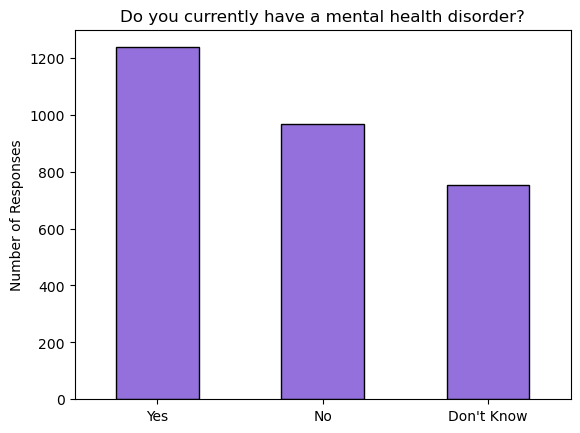

In [6]:
## Visualization for: Do you currently have a mental health disorder?
hk_mhd_status_counts.plot(kind='bar', rot=0, facecolor="mediumpurple", edgecolor = "black")
# Label some things
plt.title("Do you currently have a mental health disorder?")
plt.xlabel("")
plt.ylabel("Number of Responses")
plt.show()

If someone has a mental health disorder, does it interfere with their work?

Naturally we would assume so, but in what capacity? How common are these issues?

First, we need to narrow down how many people have mental health disorders compared to those that don't. As we can see in this bar chart, "Yes" was the most common overall response with a little over 40% of participants! However, we need to be careful to only take the information we need. For the purposes of our inquiry, we only want responses from those with a confirmed diagnosis, so over half of the responses are actually not relevant to us for now.

In [11]:
# If you have a mental health disorder, does it affect productivity?
# Merge redundant answers, remove NaN, and display counts
hk_prod_answers = ["Yes", "Unsure", "No"]
hk_mhd_productivity = hk_pivoted_v2_df[hk_pivoted_v2_df["Productivity affected by MHD"].isin(hk_prod_answers)]
hk_mhd_productivity = hk_mhd_productivity["Productivity affected by MHD"]
hk_mhd_prod_counts = hk_mhd_productivity.value_counts()
hk_mhd_prod_counts

Yes       367
Unsure     60
No         26
Name: Productivity affected by MHD, dtype: int64

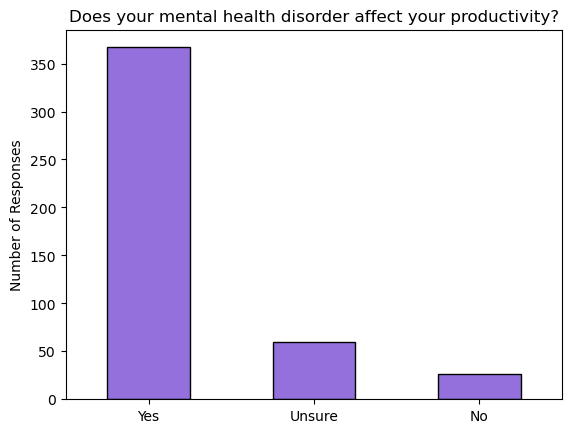

In [8]:
## Visualization for: Does your mental health disorder affect your productivity?
hk_mhd_prod_counts.plot(kind='bar', rot=0, facecolor="mediumpurple", edgecolor = "black")
# Label some things
plt.title("Does your mental health disorder affect your productivity?")
plt.xlabel("")
plt.ylabel("Number of Responses")
plt.show()

As we can see here, the vast majority (roughly 80%) of those claiming to have mental health disorders also assert that their productivity is impacted. The answer to our initial question appears to be solved, but we can actually look into this even further!

In [12]:
# If you have a mental health disorder, how often does it interfere with work?
# Merge redundant answers, remove NaN, and display counts
hk_freq_answers = ["Sometimes", "Never", "Rarely", "Often"]
hk_mhd_frequency = hk_pivoted_v2_df[hk_pivoted_v2_df["MHD Interference Frequency"].isin(hk_freq_answers)]
hk_mhd_frequency = hk_mhd_frequency["MHD Interference Frequency"]
hk_mhd_freq_counts = hk_mhd_frequency.value_counts()
hk_mhd_freq_counts

Sometimes    466
Never        213
Rarely       173
Often        144
Name: MHD Interference Frequency, dtype: int64

Text(0.5, 1.0, 'How frequently does your disorder affect your productivity?')

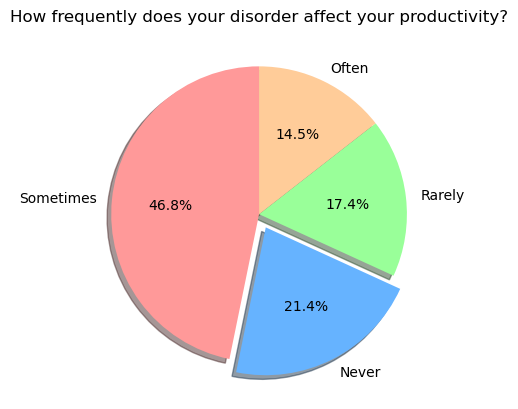

In [10]:
# Let's try pie
hk_freq_answers = ["Sometimes", "Never", "Rarely", "Often"]
hk_freq_explode = (0, 0.1, 0, 0)
hk_freq_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(hk_mhd_freq_counts, explode=hk_freq_explode, labels=hk_freq_answers, colors=hk_freq_colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("How frequently does your disorder affect your productivity?")

From this data, we can examine that ~80% impact of a mental health disorder on productivity. The responses for "Often", "Sometimes", and "Rarely" all indicate that yes, a mental health disorder does incluence the employees' workflow! A little over 20% seem to beat the odds and "Never" feel their work to be affected, and if anything, that should be commended! Good for them!

If we look back at our original responses to "Do you have a mental health disorder?", we can see that 1237 employees claimed to have a mental health disorder. If we apply the 78.7% percentage from the final chart, those whose productivity is impacted by their disorder, we find that 32.93% (one third of those surveyed!) of all productivty is influenced in some way! 

So what does all of this mean? It means we can confidently say yes, mental health disorders do affect work productivity! And it's a substantial amount too! This limited study also only examined those who had a confirmed diagnosis. The number could be higher if we were to actually have definitive tests done on those who didn't know if they were afflicted. This is a hugely impactful metric and with more thorough testing and a wider access to the healthcare needed to properly diagnose, we can take steps to improve these conditions.